<a href="https://colab.research.google.com/github/aKhalid1476/cancerous_cell_classifier/blob/main/CancerousCellClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from sklearn import metrics

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

In [14]:
data_path = 'cancer.csv'

dataframe = pd.read_csv(data_path)

# Redefine `dataframe` to include only the columns that are relavent
dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]

# Define a new, more descriptive `diagnosis_cat` column
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

# Building a boundary before Log Reg

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def boundary_classifier(target_boundary, radius_mean_series):
  predictions = []

  for radius_mean in radius_mean_series:
    if radius_mean > target_boundary:
      predictions.append(1)
    else:
      predictions.append(0)

  return predictions

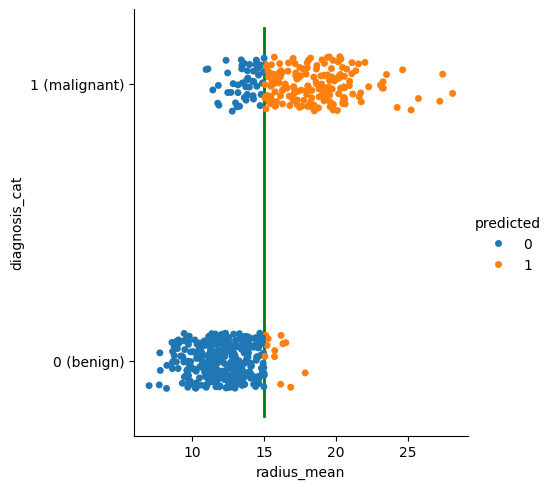

In [16]:
chosen_boundary = 15 #@param {type:"slider", min:5, max:30, step:0.5}

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

In [17]:
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8892794376098418


# Logisitic Regression

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


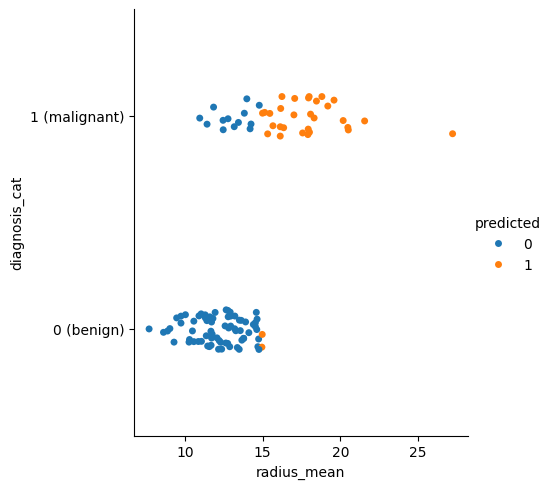

In [19]:
from sklearn import linear_model

logreg_model = linear_model.LogisticRegression()

logreg_model.fit(X_train, y_train)

X_test = test_df[X]
y_test = test_df[y]

y_pred = logreg_model.predict(X_test)

test_df['predicted'] = y_pred
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


<Axes: xlabel='radius_mean', ylabel='Predicted Probability'>

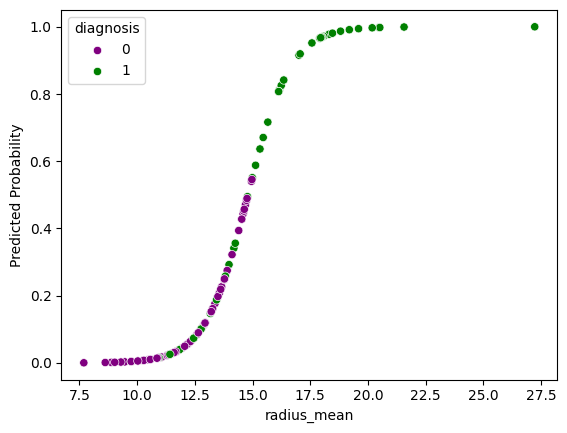

In [21]:
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

# Multi-Feature Logistic Regression

In [22]:
X = ['radius_mean','area_mean','radius_mean'] # Add your features!
y = 'diagnosis'

# Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# Prepare X_train, X_test, y_train, and y_test variables by extracting the appropriate columns
X_train, y_train = train_df[X], train_df[y]
X_test, y_test = test_df[X], test_df[y]

# Initialize the model object
multi_var_logreg_model = linear_model.LogisticRegression()

# Fit the model to the training data
multi_var_logreg_model.fit(X_train, y_train)

# Use this trained model to predict on the test data
y_pred = multi_var_logreg_model.predict(X_test)

# Evaluate the accuracy by comparing to to the test labels and print out accuracy.
print(accuracy_score(y_test, y_pred))

0.868421052631579


# Confusion Matrices

Text(0.5, 427.9555555555555, 'Predicted diagnosis')

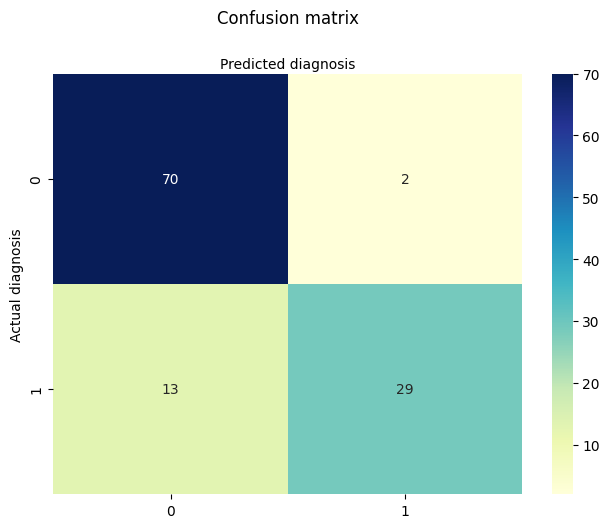

In [23]:
# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')